In [9]:
import functools
import glob
import random

# Ensure necessary modules are installed
%pip install matplotlib numpy opencv-python pandas scikit-image tqdm ipywidgets tensorflow-macos tensorflow-metal


import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm.notebook as tqdm

from skimage.feature import hog
from skimage import exposure

%matplotlib inline



Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow_metal-1.1.0-cp39-cp39-macosx_12_0_arm64.whl.metadata (1.2 kB)
Using cached tensorflow_metal-1.1.0-cp39-cp39-macosx_12_0_arm64.whl (1.4 MB)

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
random.seed(0) 
vehicle = sorted(glob.glob('./VehicleImage/vehicles/*/*.png'))
nonvehicle = sorted(glob.glob('./VehicleImage/non-vehicles/*/*.png'))

random.shuffle(vehicle)
random.shuffle(nonvehicle)

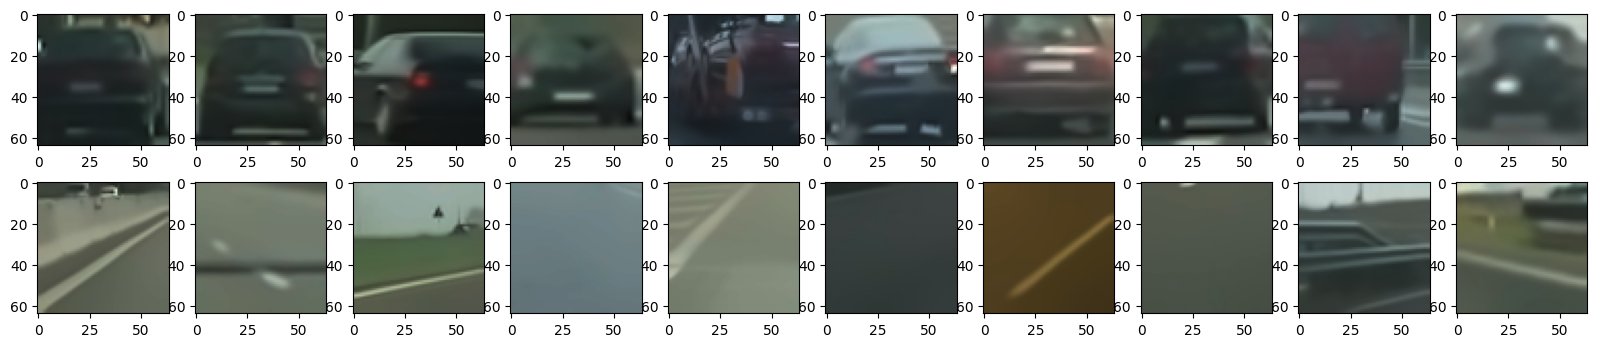

In [3]:
def denoise_image(image_path):
    img = cv2.imread(image_path)
    denoised_img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)
    return denoised_img

# Denoise vehicle images
denoised_vehicle = [denoise_image(img_path) for img_path in vehicle]

# Denoise non-vehicle images
denoised_nonvehicle = [denoise_image(img_path) for img_path in nonvehicle]

# Display some denoised images
_, (axs1, axs2) = plt.subplots(2, 10, figsize=(20, 4))
for ax, img in zip(axs1, denoised_vehicle[:10]):
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
for ax, img in zip(axs2, denoised_nonvehicle[:10]):
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.show()
plt.close() 

In [8]:
# build a dn-cnn model that denoises pictures and compare the results to the fastNlMeansDenoisingColored function
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras import models
from tensorflow.keras import layers

def build_dn_cnn():
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(3, (3, 3), activation='relu', padding='same'))
    return model

# Compile the model
model = build_dn_cnn()
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
denoised_vehicle = np.array(denoised_vehicle) / 255.0
denoised_nonvehicle = np.array(denoised_nonvehicle) / 255.0
model.fit(denoised_vehicle, denoised_vehicle, epochs=10, batch_size=32, validation_data=(denoised_nonvehicle, denoised_nonvehicle))

# Denoise vehicle images using the trained
denoised_vehicle = model.predict(denoised_vehicle) * 255.0
denoised_nonvehicle = model.predict(denoised_nonvehicle) * 255.0

# Display some denoised images
_, (axs1, axs2) = plt.subplots(2, 10, figsize=(20, 4))
for ax, img in zip(axs1, denoised_vehicle[:10]):
    ax.imshow(img.astype(np.uint8))
for ax, img in zip(axs2, denoised_nonvehicle[:10]):
    ax.imshow(img.astype(np.uint8))
    
plt.show()
plt.close()

# Extract HOG features from the images
def extract_hog_features(image):
    return hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys')

# Extract HOG features from the denoised images
hog_features_vehicle = [extract_hog_features(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)) for img in denoised_vehicle]
hog_features_nonvehicle = [extract_hog_features(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)) for img in denoised_nonvehicle]

# Display HOG features
_, (axs1, axs2) = plt.subplots(2, 10, figsize=(20, 4))
for ax, img in zip(axs1, denoised_vehicle[:10]):
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
for ax, img in zip(axs2, denoised_nonvehicle[:10]):
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.show()
plt.close()

_, (axs1, axs2) = plt.subplots(2, 10, figsize=(20, 4))
for ax, img in zip(axs1, hog_features_vehicle[:10]):
    ax.plot(img)






/Users/macbook/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/macbook/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'denoised_vehicle' is not defined

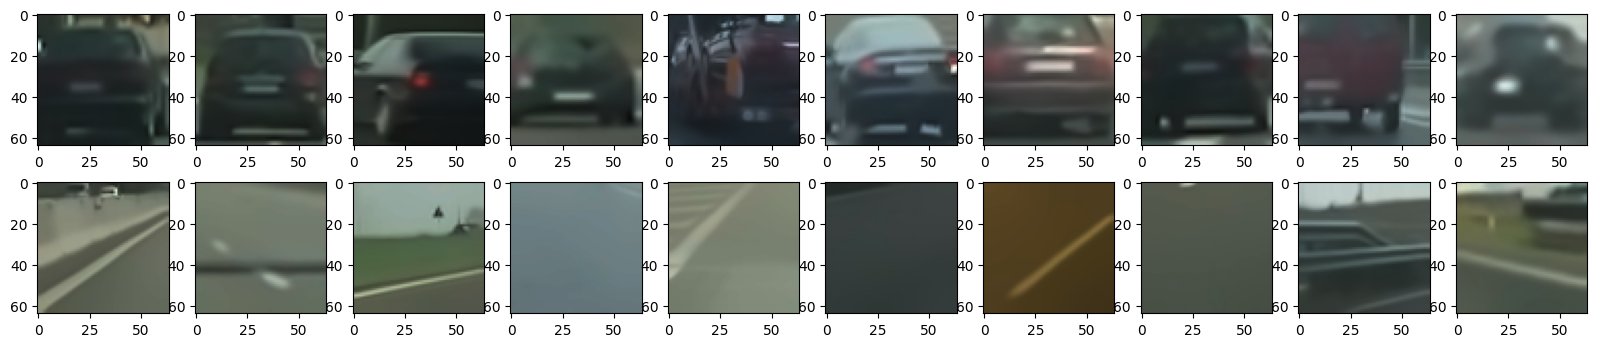

In [4]:
# This code displays a set of denoised images using Matplotlib.

# Subplots Creation: The line `_, (axs1, axs2) = plt.subplots(2, 10, figsize=(20, 4))` 
# creates a figure with 2 rows and 10 columns of subplots, and sets the figure size to 20x4 inches.
_, (axs1, axs2) = plt.subplots(2, 10, figsize=(20, 4))
for ax, img in zip(axs1, denoised_vehicle[:10]):
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
for ax, img in zip(axs2, denoised_nonvehicle[:10]):
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.show()
plt.close()


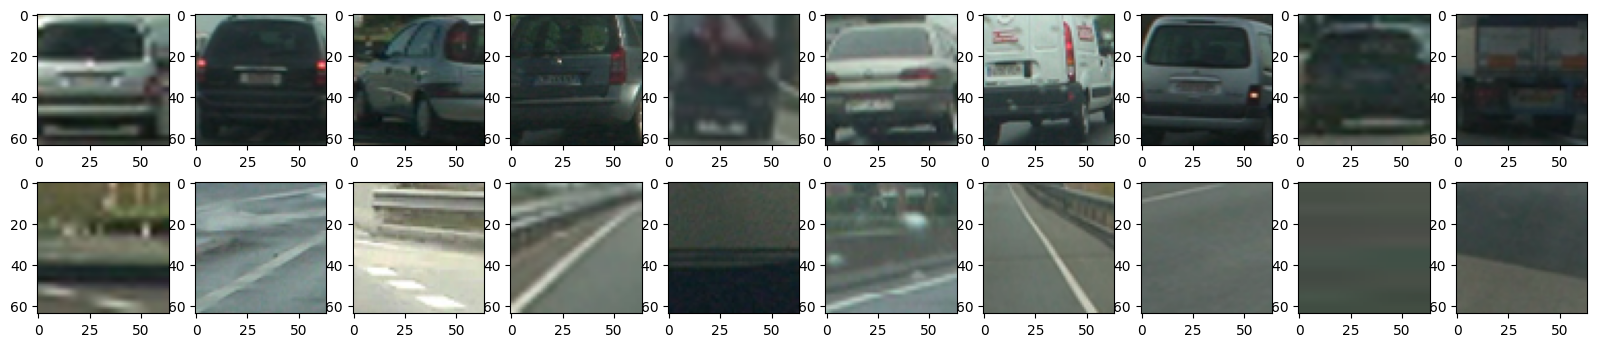

In [5]:

# random.seed(0)
_, (axs1, axs2) = plt.subplots(2, 10, figsize=(20, 4))
for ax in axs1:
    img = cv2.imread(random.choice(vehicle))[:, :, ::-1]
    ax.imshow(img)
for ax in axs2:
    img = cv2.imread(random.choice(nonvehicle))[:, :, ::-1]
    ax.imshow(img)

plt.show()
plt.close()

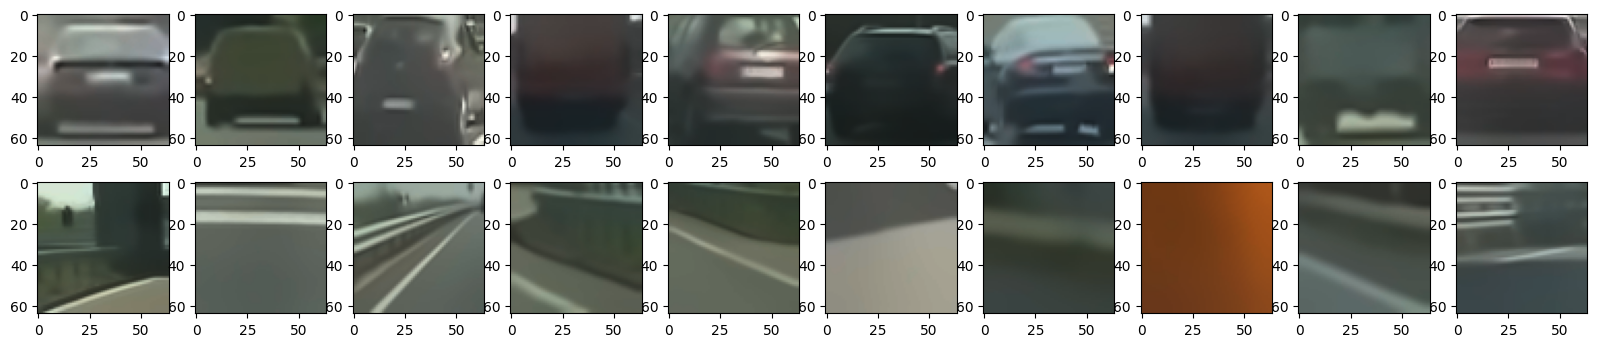

In [6]:
_, (axs1, axs2) = plt.subplots(2, 10, figsize=(20, 4))
for ax in axs1:
    img = random.choice(denoised_vehicle)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
for ax in axs2:
    img = random.choice(denoised_nonvehicle)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.show()
plt.close()

Computing + visualising HOG features¶

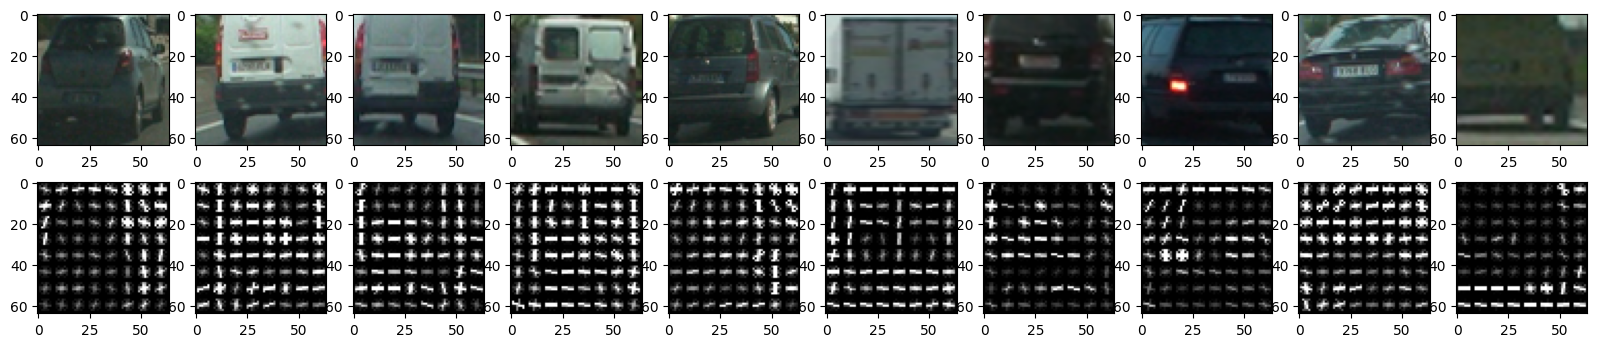

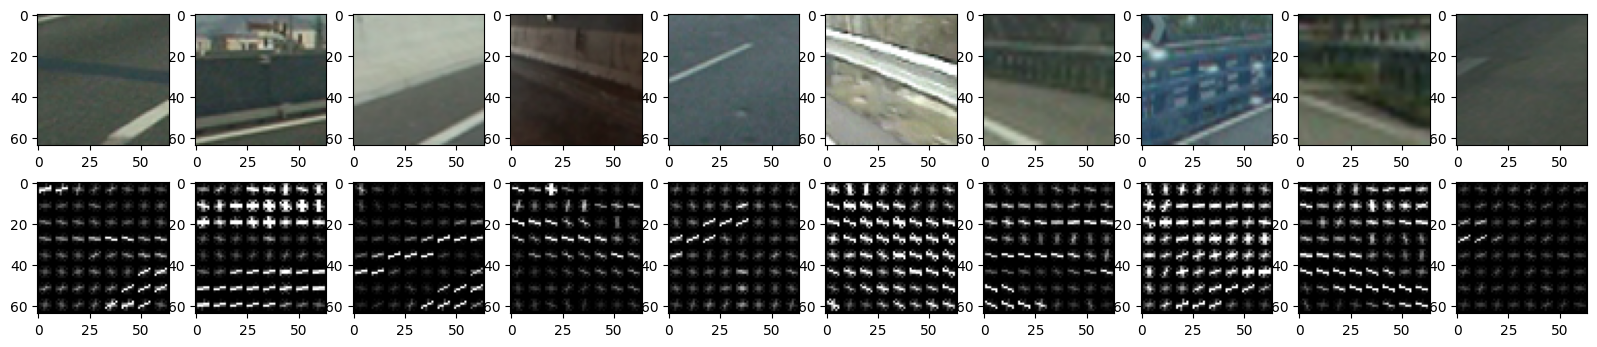

In [7]:
random.seed(0)
_, (axs1, axs2) = plt.subplots(2, 10, figsize=(20, 4))
for ax1, ax2 in zip(axs1, axs2):
    img = cv2.imread(random.choice(vehicle))[:, :, ::-1]
    ax1.imshow(img)
    
    # img = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    _, img = hog(img, orientations=8, pixels_per_cell=(8, 8),
                 cells_per_block=(1, 1), visualize=True, channel_axis=-1)
    # Rescale histogram for better display
    img = exposure.rescale_intensity(img, in_range=(0, 10))
    ax2.imshow(img, cmap='gray')

plt.show()

random.seed(0)
_, (axs1, axs2) = plt.subplots(2, 10, figsize=(20, 4))
for ax1, ax2 in zip(axs1, axs2):
    img = cv2.imread(random.choice(nonvehicle))[:, :, ::-1]
    ax1.imshow(img)
    
    # img = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    _, img = hog(img, orientations=8, pixels_per_cell=(8, 8),
                 cells_per_block=(1, 1), visualize=True,  channel_axis=-1)
    # Rescale histogram for better display
    img = exposure.rescale_intensity(img, in_range=(0, 10))
    ax2.imshow(img, cmap='gray')

plt.show()
plt.close()

plt.close()

Computing + visualising HOG features¶ for the denoised images

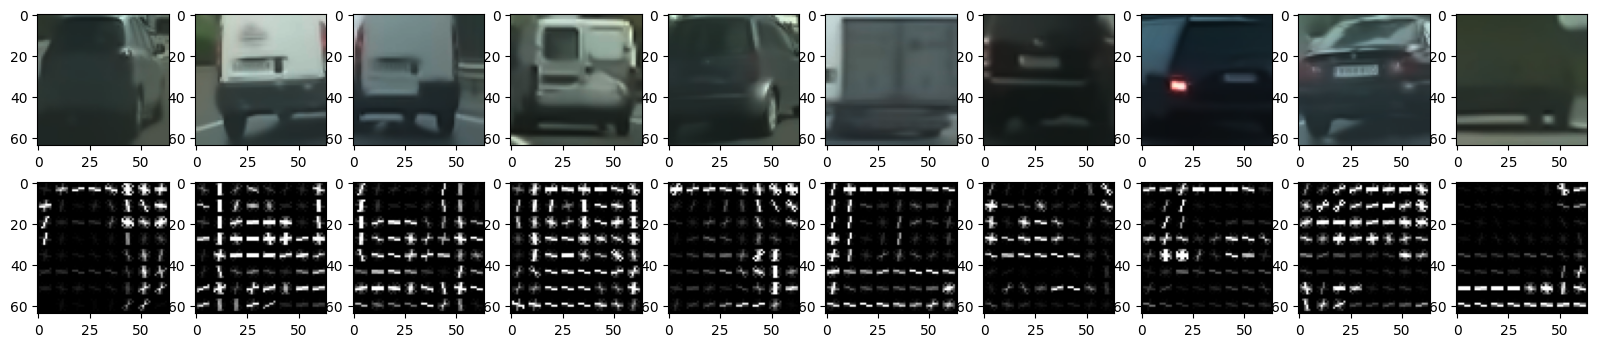

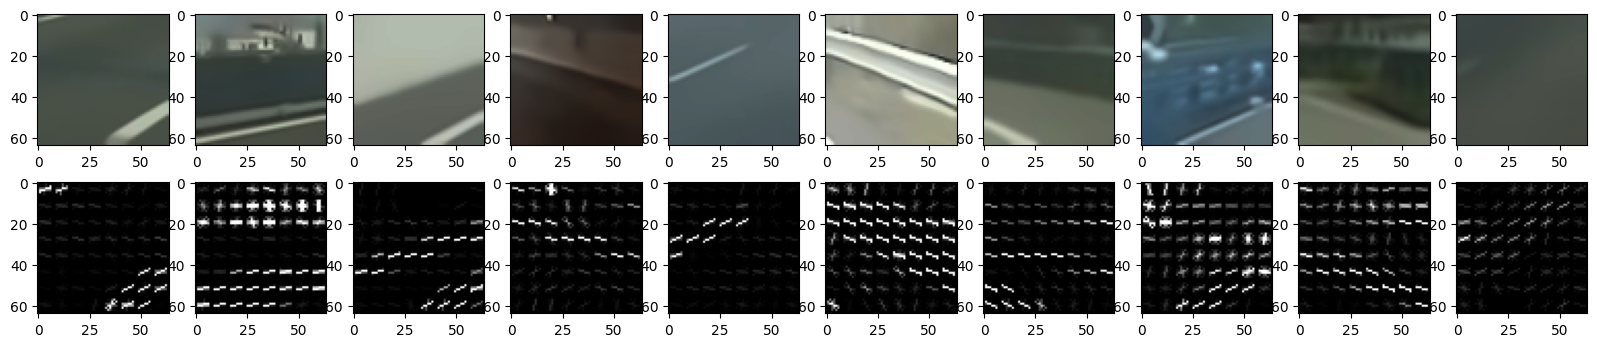

In [8]:
random.seed(0)
_, (axs1, axs2) = plt.subplots(2, 10, figsize=(20, 4))
for ax1, ax2 in zip(axs1, axs2):
    img = random.choice(denoised_vehicle)
    ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    _, img_hog = hog(img, orientations=8, pixels_per_cell=(8, 8),
                     cells_per_block=(1, 1), visualize=True, channel_axis=-1)
    img_hog = exposure.rescale_intensity(img_hog, in_range=(0, 10))
    ax2.imshow(img_hog, cmap='gray')

plt.show()

random.seed(0)
_, (axs1, axs2) = plt.subplots(2, 10, figsize=(20, 4))
for ax1, ax2 in zip(axs1, axs2):
    img = random.choice(denoised_nonvehicle)
    ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    _, img_hog = hog(img, orientations=8, pixels_per_cell=(8, 8),
                     cells_per_block=(1, 1), visualize=True, channel_axis=-1)
    img_hog = exposure.rescale_intensity(img_hog, in_range=(0, 10))
    ax2.imshow(img_hog, cmap='gray')

plt.show()
plt.close()

In [9]:
%pip install ipywidgets
import ipywidgets as widgets
import cv2
import numpy as np
import tqdm
from skimage.feature import hog

COLOR_CONVERSION = None
ORIENTATIONS = 9
CELLS_PER_BLOCK = (3, 3)
PIXELS_PER_CELL = (8, 8)


def hog_features(img):
    """img = rgb_img"""
    if isinstance(img, str):
        img = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
    if COLOR_CONVERSION is not None:
        img = cv2.cvtColor(img, COLOR_CONVERSION)
    
    vec = hog(
        img,
        orientations=ORIENTATIONS,
        pixels_per_cell=PIXELS_PER_CELL,
        cells_per_block=CELLS_PER_BLOCK,
        channel_axis=-1  # Use channel_axis instead of multichannel
    )
    return vec


# Define vehicle as 'positive' class and nonvehicle as 'negative' class
x_vehicle = np.array([hog_features(img) for img in tqdm.tqdm(vehicle)])
y_vehicle = np.array([1 for _ in x_vehicle])

x_novehicle = np.array([hog_features(img) for img in tqdm.tqdm(nonvehicle)])
y_novehicle = np.array([-1 for _ in x_novehicle])

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


100%|██████████| 3900/3900 [00:06<00:00, 619.78it/s]


In [10]:
%pip install ipywidgets
import ipywidgets as widgets

# Define vehicle as 'positive' class and nonvehicle as 'negative' class for denoised images
x_denoised_vehicle = np.array([hog_features(img) for img in tqdm.tqdm(denoised_vehicle)])
y_denoised_vehicle = np.array([1 for _ in x_denoised_vehicle])

x_denoised_nonvehicle = np.array([hog_features(img) for img in tqdm.tqdm(denoised_nonvehicle)])
y_denoised_nonvehicle = np.array([-1 for _ in x_denoised_nonvehicle])

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


100%|██████████| 3900/3900 [00:04<00:00, 903.20it/s] 


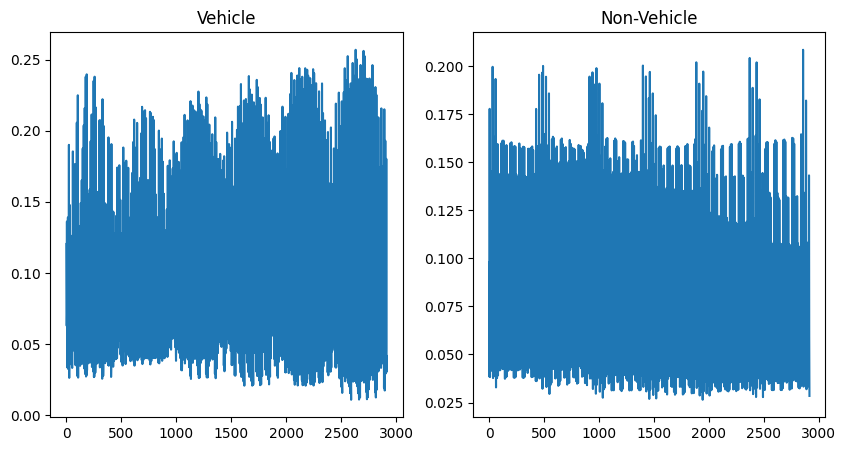

In [11]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title('Vehicle')
ax2.set_title('Non-Vehicle')
ax1.plot(x_vehicle.mean(axis=0))
ax2.plot(x_novehicle.mean(axis=0))
plt.show()
plt.close()

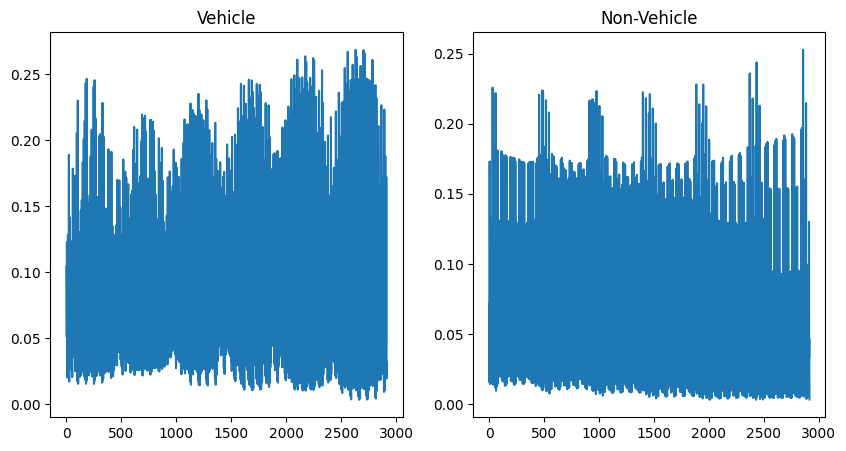

In [17]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title('Vehicle')
ax2.set_title('Non-Vehicle')
ax1.plot(x_denoised_vehicle.mean(axis=0))
ax2.plot(x_denoised_nonvehicle.mean(axis=0))
plt.show()
plt.close()

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


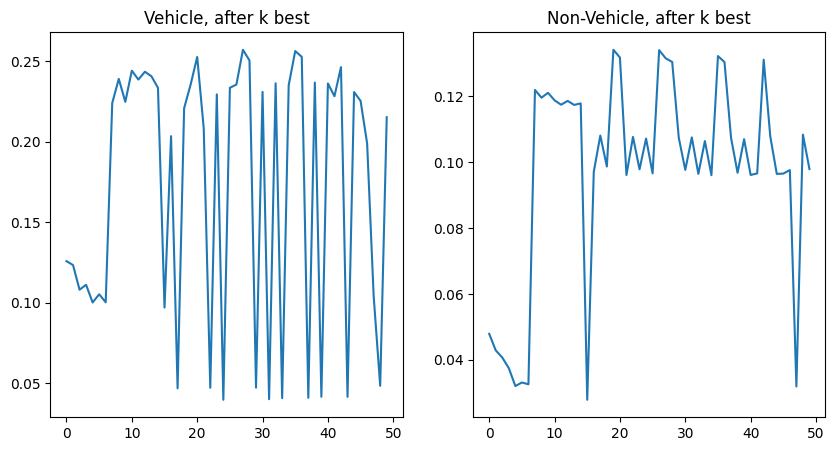

In [18]:
%pip install scikit-learn
from sklearn.feature_selection import SelectKBest

K = 50
_x = np.concatenate([x_vehicle, x_novehicle])
_y = np.concatenate([y_vehicle, y_novehicle])

select = SelectKBest(k=K).fit(_x, _y)

x_vehicle = select.transform(x_vehicle)
x_novehicle = select.transform(x_novehicle)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title('Vehicle, after k best')
ax2.set_title('Non-Vehicle, after k best')
ax1.plot(x_vehicle.mean(axis=0))
ax2.plot(x_novehicle.mean(axis=0))
plt.show()
plt.close()

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


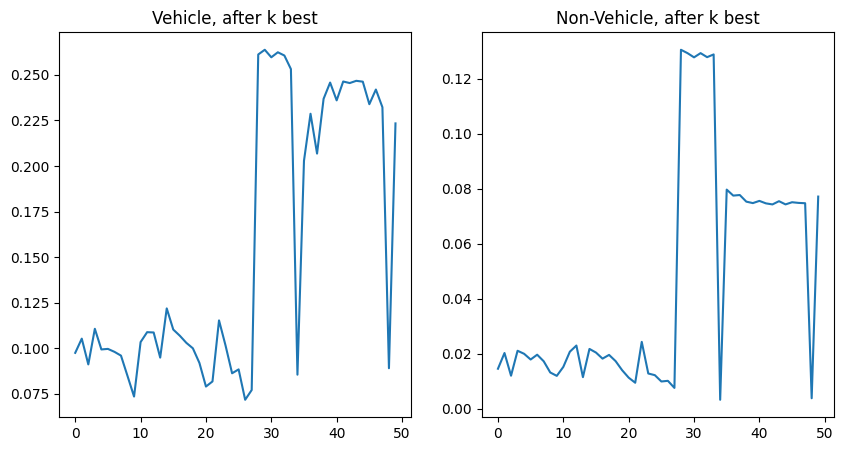

In [25]:
%pip install scikit-learn
from sklearn.feature_selection import SelectKBest

K = 50
_x = np.concatenate([x_denoised_vehicle, x_denoised_nonvehicle])
_y = np.concatenate([y_denoised_vehicle, y_denoised_nonvehicle])

select = SelectKBest(k=K).fit(_x, _y)

x_denoised_vehicle = select.transform(x_denoised_vehicle)
x_denoised_nonvehicle = select.transform(x_denoised_nonvehicle)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title('Vehicle, after k best')
ax2.set_title('Non-Vehicle, after k best')
ax1.plot(x_denoised_vehicle.mean(axis=0))
ax2.plot(x_denoised_nonvehicle.mean(axis=0))
plt.show()
plt.close()

OCSVM

In [19]:
# Using vehicle as inlier class

from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split

x_in, x_out = x_vehicle, x_novehicle

x_in_train, x_in_test = train_test_split(x_in, test_size=0.2, random_state=0)

ocsvm = OneClassSVM(
    kernel='rbf',
    gamma='scale',
    nu=0.001,
).fit(x_in_train)

y = ocsvm.predict(x_in_train)
cls, cnts = np.unique(y, return_counts=True)
print('Inlier train', cls, cnts / cnts.sum())

y = ocsvm.predict(x_in_test)
cls, cnts = np.unique(y, return_counts=True)
print('Inlier test', cls, cnts / cnts.sum())

y = ocsvm.predict(x_out)
cls, cnts = np.unique(y, return_counts=True)
print('Outlier class', cls, cnts / cnts.sum())

Inlier train [-1  1] [0.01167883 0.98832117]
Inlier test [-1  1] [0.01313869 0.98686131]
Outlier class [-1  1] [0.11512821 0.88487179]


In [42]:
# Using denoised vehicle as inlier class

x_in, x_out = x_denoised_vehicle, x_denoised_nonvehicle

x_in_train, x_in_test = train_test_split(x_in, test_size=0.2, random_state=0)

ocsvm = OneClassSVM(
    kernel='rbf',
    gamma='scale',
    nu=0.001,
).fit(x_in_train)

y = ocsvm.predict(x_in_train)
cls, cnts = np.unique(y, return_counts=True)
print('Inlier train', cls, cnts / cnts.sum())

y = ocsvm.predict(x_in_test)
cls, cnts = np.unique(y, return_counts=True)
print('Inlier test', cls, cnts / cnts.sum())

y = ocsvm.predict(x_out)
cls, cnts = np.unique(y, return_counts=True)
print('Outlier class', cls, cnts / cnts.sum())

Inlier train [-1  1] [0.01350365 0.98649635]
Inlier test [-1  1] [0.01751825 0.98248175]
Outlier class [-1  1] [0.21 0.79]


In [20]:
# Using no vehicle as inlier class
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split

x_in, x_out = x_novehicle, x_vehicle

x_in_train, x_in_test = train_test_split(x_in, test_size=0.2, random_state=0)

ocsvm = OneClassSVM(
    kernel='rbf',
    gamma='scale',
    tol=0.001,
    nu=0.001,
).fit(x_in_train)

y = ocsvm.predict(x_in_train)
cls, cnts = np.unique(y, return_counts=True)
print('Inlier train', cls, cnts / cnts.sum())

y = ocsvm.predict(x_in_test)
cls, cnts = np.unique(y, return_counts=True)
print('Inlier test', cls, cnts / cnts.sum())

y = ocsvm.predict(x_out)
cls, cnts = np.unique(y, return_counts=True)
print('Outlier class', cls, cnts / cnts.sum())

Inlier train [-1  1] [0.01634615 0.98365385]
Inlier test [-1  1] [0.02435897 0.97564103]
Outlier class [-1  1] [0.42510949 0.57489051]


In [41]:
# Using denoised non-vehicle as inlier class
x_in, x_out = x_denoised_nonvehicle, x_denoised_vehicle

x_in_train, x_in_test = train_test_split(x_in, test_size=0.2, random_state=0)

ocsvm = OneClassSVM(
    kernel='rbf',
    gamma='scale',
    tol=0.001,
    nu=0.001,
).fit(x_in_train)

y = ocsvm.predict(x_in_train)
cls, cnts = np.unique(y, return_counts=True)
print('Inlier train', cls, cnts / cnts.sum())

y = ocsvm.predict(x_in_test)
cls, cnts = np.unique(y, return_counts=True)
print('Inlier test', cls, cnts / cnts.sum())

y = ocsvm.predict(x_out)
cls, cnts = np.unique(y, return_counts=True)
print('Outlier class', cls, cnts / cnts.sum())

Inlier train [-1  1] [0.01987179 0.98012821]
Inlier test [-1  1] [0.02435897 0.97564103]
Outlier class [-1  1] [0.66978102 0.33021898]


APPLY PLATT SCALING

In [21]:
from sklearn.linear_model import LogisticRegressionCV as LRCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report as cr, confusion_matrix as cm


def train_ocsvm_proba(ocsvm, x_in, x_out, cv=5, platt_split=0.2):
    # Actual features + labels
    x = np.concatenate([x_in, x_out])
    y = np.concatenate([[1 for _ in x_in], [-1 for _ in x_out]])
    
    x_platt = ocsvm.decision_function(x)
    # y_platt = ocsvm.predict(x)
    y_platt = y
    
    x_platt, _, y_platt, _ = train_test_split(x_platt, y_platt, train_size=platt_split, random_state=42, shuffle=True)
    
    lr = LRCV(cv=cv, random_state=42).fit(x_platt.reshape(-1, 1), y_platt)
    return lr
    

lr = train_ocsvm_proba(ocsvm, x_in, x_out)
print("Platt classes: ", lr.classes_)
_x = np.concatenate([x_in, x_out])
_y = np.concatenate([[1 for _ in x_in], [-1 for _ in x_out]])

y_prob = lr.predict_proba(ocsvm.decision_function(_x).reshape(-1, 1))
assert (y_prob.sum(axis=1) == 1).all()

t = 0.5
y = np.where(y_prob[:, 1] > t, 1, -1)

print(cm(y_true=_y, y_pred=y))
print(cr(y_true=_y, y_pred=y))

Platt classes:  [-1  1]
[[2669  756]
 [ 650 3250]]
              precision    recall  f1-score   support

          -1       0.80      0.78      0.79      3425
           1       0.81      0.83      0.82      3900

    accuracy                           0.81      7325
   macro avg       0.81      0.81      0.81      7325
weighted avg       0.81      0.81      0.81      7325



In [48]:
from sklearn.linear_model import LogisticRegressionCV as LRCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report as cr, confusion_matrix as cm


def train_ocsvm_proba(ocsvm, x_in, x_out, cv=5, platt_split=0.2):
    # Actual features + labels
    x = np.concatenate([x_in, x_out])
    y = np.concatenate([[1 for _ in x_in], [-1 for _ in x_out]])
    
    x_platt = ocsvm.decision_function(x)
    # y_platt = ocsvm.predict(x)
    y_platt = y
    
    x_platt, _, y_platt, _ = train_test_split(x_platt, y_platt, train_size=platt_split, random_state=42, shuffle=True)
    
    lr = LRCV(cv=cv, random_state=42).fit(x_platt.reshape(-1, 1), y_platt)
    return lr

lr = train_ocsvm_proba(ocsvm, x_denoised_vehicle, x_denoised_nonvehicle)
_x = np.concatenate([x_denoised_vehicle, x_denoised_nonvehicle])
_y = np.concatenate([[1 for _ in x_denoised_vehicle], [-1 for _ in x_denoised_nonvehicle]])

y_prob = lr.predict_proba(ocsvm.decision_function(_x).reshape(-1, 1))[:, 1]
assert (y_prob <= 1).all()
assert (y_prob >= 0).all()

t = 0.5
y = np.where(y_prob > t, 1, -1)

print(cm(y_true=_y, y_pred=y))
print(cr(y_true=_y, y_pred=y))

[[3129  771]
 [1112 2313]]
              precision    recall  f1-score   support

          -1       0.74      0.80      0.77      3900
           1       0.75      0.68      0.71      3425

    accuracy                           0.74      7325
   macro avg       0.74      0.74      0.74      7325
weighted avg       0.74      0.74      0.74      7325



In [40]:
lr = train_ocsvm_proba(ocsvm, x_denoised_vehicle, x_denoised_nonvehicle)
_x = np.concatenate([x_denoised_vehicle, x_denoised_nonvehicle])
_y = np.concatenate([[1 for _ in x_denoised_vehicle], [-1 for _ in x_denoised_nonvehicle]])

y_prob = lr.predict(ocsvm.decision_function(_x))
assert (y_prob <= 1).all()
assert (y_prob >= 0).all()

t = 0.5
y = np.where(y_prob > t, 1, -1)

print(cm(y_true=_y, y_pred=y))
print(cr(y_true=_y, y_pred=y))

[[3819   81]
 [1131 2294]]
              precision    recall  f1-score   support

          -1       0.77      0.98      0.86      3900
           1       0.97      0.67      0.79      3425

    accuracy                           0.83      7325
   macro avg       0.87      0.82      0.83      7325
weighted avg       0.86      0.83      0.83      7325



In [44]:
glm = train_ocsvm_proba(ocsvm, x_denoised_vehicle, x_denoised_nonvehicle)
_x = np.concatenate([x_denoised_vehicle, x_denoised_nonvehicle])
_y = np.concatenate([[1 for _ in x_denoised_vehicle], [-1 for _ in x_denoised_nonvehicle]])

y_prob = glm.predict(ocsvm.decision_function(_x))
assert (y_prob <= 1).all()
assert (y_prob >= 0).all()

t = 0.65
y = np.where(y_prob > t, 1, -1)

print(cm(y_true=_y, y_pred=y))
print(cr(y_true=_y, y_pred=y))

[[3287  613]
 [1315 2110]]
              precision    recall  f1-score   support

          -1       0.71      0.84      0.77      3900
           1       0.77      0.62      0.69      3425

    accuracy                           0.74      7325
   macro avg       0.74      0.73      0.73      7325
weighted avg       0.74      0.74      0.73      7325

